# *New Delhi Real Estate*

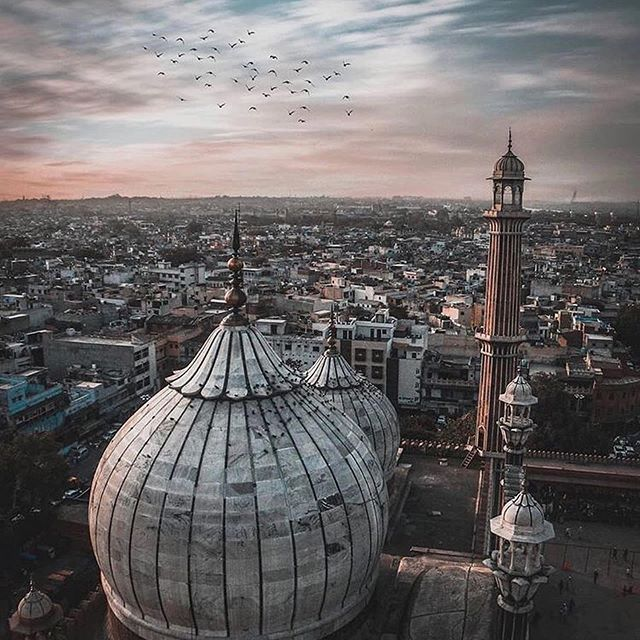

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\Bakht\Desktop\MagicBricks.csv')

In [4]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [6]:
missing_data = df.isnull()
missing_data.head(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Area
False    1259
Name: Area, dtype: int64

BHK
False    1259
Name: BHK, dtype: int64

Bathroom
False    1257
True        2
Name: Bathroom, dtype: int64

Furnishing
False    1254
True        5
Name: Furnishing, dtype: int64

Locality
False    1259
Name: Locality, dtype: int64

Parking
False    1226
True       33
Name: Parking, dtype: int64

Price
False    1259
Name: Price, dtype: int64

Status
False    1259
Name: Status, dtype: int64

Transaction
False    1259
Name: Transaction, dtype: int64

Type
False    1254
True        5
Name: Type, dtype: int64

Per_Sqft
False    1018
True      241
Name: Per_Sqft, dtype: int64



In [8]:
avg_Bathroom = df["Bathroom"].astype("float").mean(axis=0)
print("Average of Bathroom:", avg_Bathroom)

Average of Bathroom: 2.556085918854415


In [9]:
avg_Parking = df["Parking"].astype("float").mean(axis=0)
print("Average of Parking:", avg_Parking)

Average of Parking: 1.935562805872757


In [10]:
avg_Per_Sqft = df["Per_Sqft"].astype("float").mean(axis=0)
print("Average of Per_Sqft:", avg_Per_Sqft)

Average of Per_Sqft: 15690.136542239685


In [11]:
df["Bathroom"].replace(np.nan, avg_Bathroom, inplace = True)
df["Parking"].replace(np.nan, avg_Parking, inplace = True)
df["Per_Sqft"].replace(np.nan, avg_Per_Sqft, inplace = True)



# What factors affect the price of a unit?



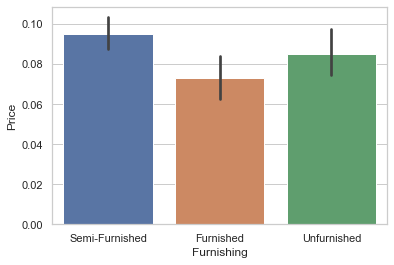

In [12]:
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.barplot(x="Furnishing", y="Price", data=df)


# Does the number of bathrooms have a postive linear relationship with price and be a good predictor?


(0, 0.6993549693207762)

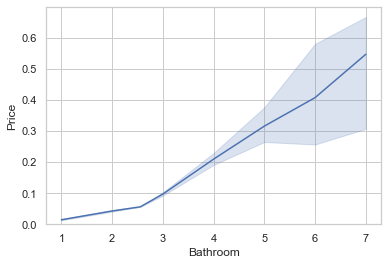

In [18]:
df['Price'] = df['Price']/df['Price'].max()
sns.lineplot(x="Bathroom", y="Price", data=df)
plt.ylim(0,)

In [101]:
df[["Bathroom", "Price"]].corr()

,Bathroom,Price
Bathroom,1.000000,0.727941
Price,0.727941,1.000000


# What type of unit sells for more?

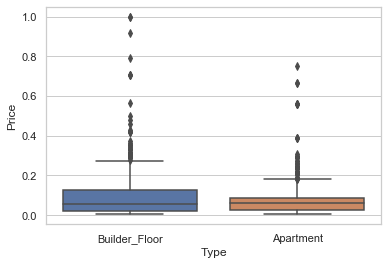

In [100]:
sns.boxplot(x="Type", y="Price", data=df)

# Is the number of (BHK) a good predictor of price? What is the correlation? Is it better than Bathrooms?

,BHK,Price
BHK,1.000000,0.573059
Price,0.573059,1.000000


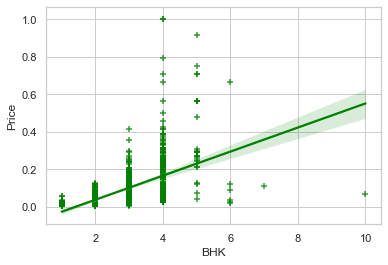

In [114]:
import seaborn as sns
ax = sns.regplot(x='BHK', y='Price', data=df, color='green', marker='+')
df[["BHK", "Price"]].corr()

# Calculate P Value

In [133]:
from scipy import stats

In [135]:
pearson_coef, p_value = stats.pearsonr(df['Bathroom'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7279408934723777  with a P-value of P = 1.9183789316073223e-207


In [136]:
pearson_coef, p_value = stats.pearsonr(df['BHK'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5730590952635986  with a P-value of P = 2.3268145608661864e-110


In [138]:
pearson_coef, p_value = stats.pearsonr(df['Parking'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.0004828492506084225  with a P-value of P = 0.9863715654279621


In [139]:
pearson_coef, p_value = stats.pearsonr(df['Per_Sqft'], df['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.31581230866391163  with a P-value of P = 1.9305029797328324e-30


# Lets create a model and see if the selected features accurately predict the price of each unit 

In [146]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

df[["Per_Sqft","Bathroom","BHK"]].corr()

,Per_Sqft,Bathroom,BHK
Per_Sqft,1.000000,0.209267,0.163677
Bathroom,0.209267,1.000000,0.774125
BHK,0.163677,0.774125,1.000000


In [160]:
Z = df[['Per_Sqft','Bathroom', 'BHK']]
lm.fit(Z, df['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
lm.intercept_

-0.11005536180766083

In [163]:
lm.coef_

array([9.63104156e-07, 6.90819171e-02, 2.58667179e-03])

In [150]:
Y_hat = lm.predict(Z)

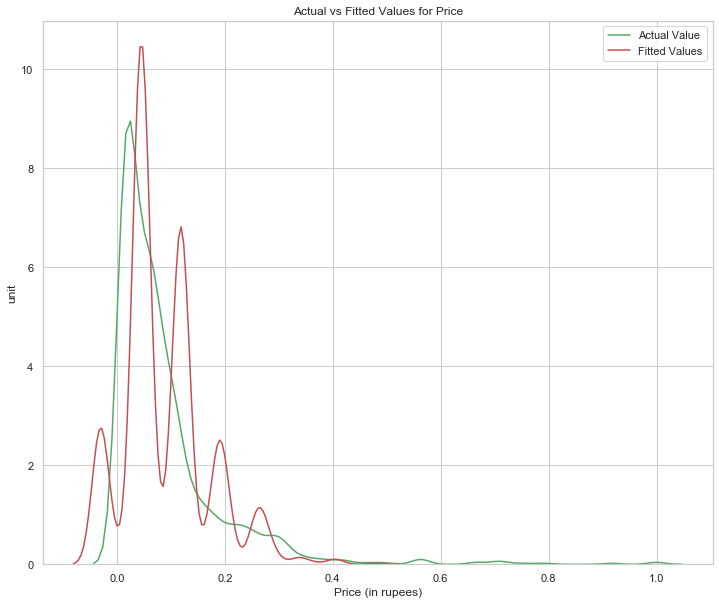

In [311]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['Price'], hist=False, color="g", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="r", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in rupees)')
plt.ylabel('unit')

plt.show()
plt.close()

In [207]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')


Libraries imported.


# Using Foursquare location data.

In [243]:
from geopy.geocoders import Nominatim
address = 'New Delhi, Delhi'

geolocator = Nominatim(user_agent="Delhi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Delhi are 28.6141793, 77.2022662.


In [244]:
LIMIT = 100# limit of number of venues returned by Foursquare API
radius = 500



url = 'https://api.foursquare.com/v2/venues/explore?&client_id=JGGBRN5XODTLZGJOMCSWIQMRH1JLGJKPSFR10XNB2R5U25GR&client_secret=KWRAMLK2HOJBQ2XLICLKXRU3M4HOCC1U2VG4Y4OPP5JF03QX&v=20180605&ll=28.644800,77.216721&radius=500&limit=100'

results = requests.get(url).json()
results


{'meta': {'code': 200, 'requestId': '5edbbf0f216785001b2cedc6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Delhi',
  'headerFullLocation': 'Central Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 24,
  'suggestedBounds': {'ne': {'lat': 28.649300004500006,
    'lng': 77.2218390029765},
   'sw': {'lat': 28.640299995499994, 'lng': 77.21160299702352}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '518ddbdf498eab246c509547',
       'name': 'bloomrooms @ New Delhi Railway Station',
       'location': {'address': '8591, Arakashan Road',
        'crossStreet': 'opp. new delhi railway station',
        'lat': 28.64553655967833,
        'lng': 

In [291]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Lets see how many different venues are nearby the neighbourhoods we are trying to make a purchase


In [293]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(50)


C:\Users\Bakht\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,bloomrooms @ New Delhi Railway Station,Hotel,28.645537,77.217701
1,The Indian Grill Restaurant,Restaurant,28.646141,77.215133
2,The Prime Balaji Deluxe @ New Delhi Railway St...,Hotel,28.645247,77.217433
3,The Drunkyard Cafe,Tibetan Restaurant,28.641451,77.215506
4,Hotel Aman International,Hotel,28.641515,77.216148
5,McDonald's,Fast Food Restaurant,28.644934,77.213988
6,Hotel City Star,Hotel,28.644661,77.214872
7,Hotel Amax,Hotel,28.646791,77.213295
8,Hotel Godwin Deluxe New Delhi,Motel,28.645966,77.215254
9,Zostel Delhi,Hostel,28.645590,77.217373


In [294]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

24 venues were returned by Foursquare.


# Let's find out how many unique categories are in the area we are trying to purchase a house 


In [304]:
Delhivenues = nearby_venues
Delhivenues.groupby('categories').count()



,name,lat,lng
categories,,,
Café,1,1,1
Coffee Shop,1,1,1
Fast Food Restaurant,2,2,2
Hostel,1,1,1
Hotel,11,11,11
Motel,1,1,1
Pizza Place,1,1,1
Platform,1,1,1
Restaurant,3,3,3


In [305]:
print('There are {} uniques categories.'.format(len(Delhivenues['categories'].unique())))

There are 11 uniques categories.
